* Name: Kartik Ghule
* Roll No: 13156
* Div & Batch: A - A3

# Selection Sort

Enter numbers separated by space:  64 25 12 22 11


Sorting steps:


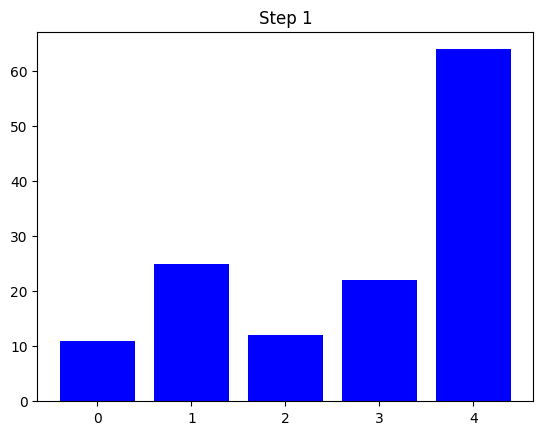

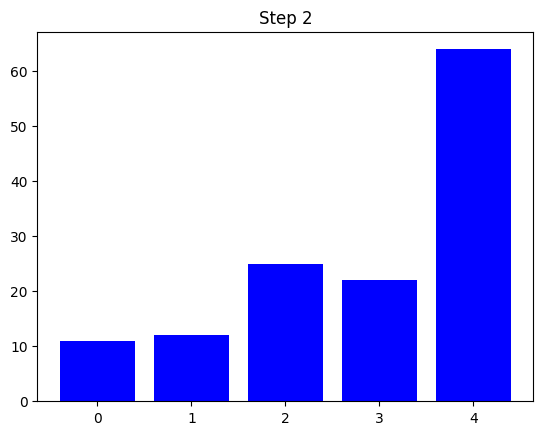

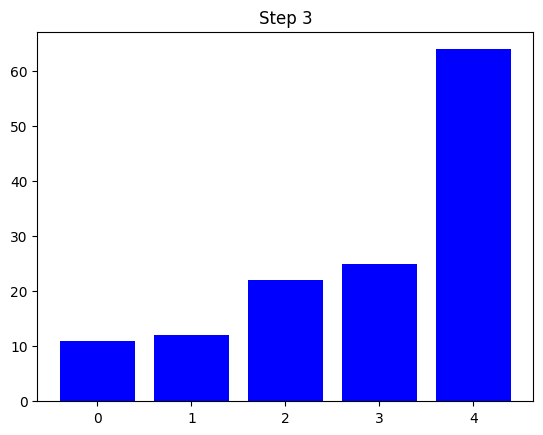

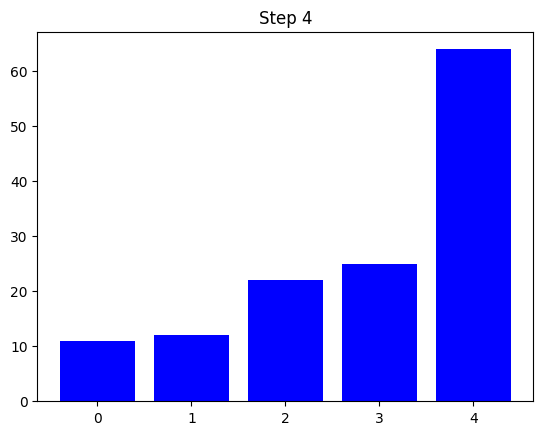

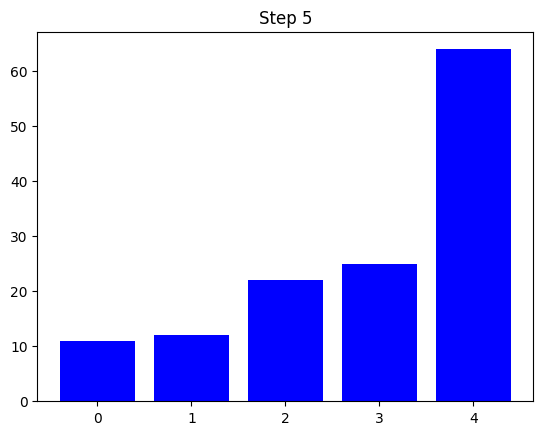

Sorted array: [11, 12, 22, 25, 64]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]  # Swap
        visualize_sort(arr, i)  # Visualization after each step

def visualize_sort(arr, step):
    plt.clf()
    plt.bar(range(len(arr)), arr, color='blue')
    plt.title(f"Step {step + 1}")
    plt.pause(0.5)

# User Input
arr = list(map(int, input("Enter numbers separated by space: ").split()))
print("Sorting steps:")
plt.ion()
selection_sort(arr)
plt.ioff()
plt.show()
print("Sorted array:", arr)

# Minimum Spanning Tree (MST) - Prim’s Algorithm

Enter number of nodes:  5
Enter number of edges:  7
Enter edge (u, v, weight):  0 1 2
Enter edge (u, v, weight):  0 2 3
Enter edge (u, v, weight):  1 2 8
Enter edge (u, v, weight):  1 3 6
Enter edge (u, v, weight):  1 4 5
Enter edge (u, v, weight):  2 4 7
Enter edge (u, v, weight):  3 4 5


Running Prim's Algorithm...


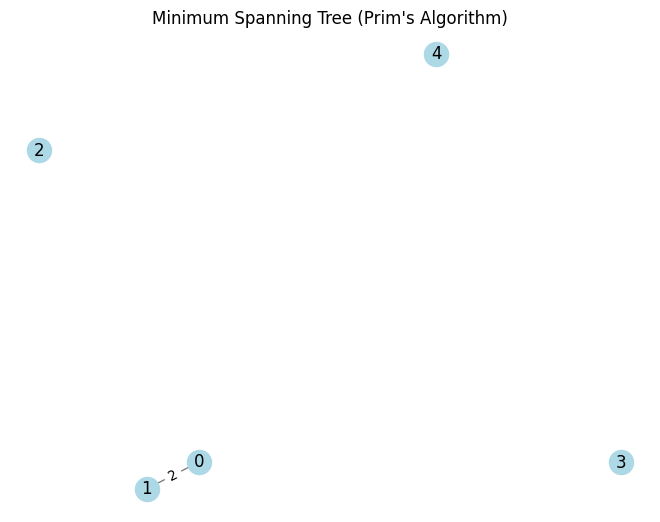

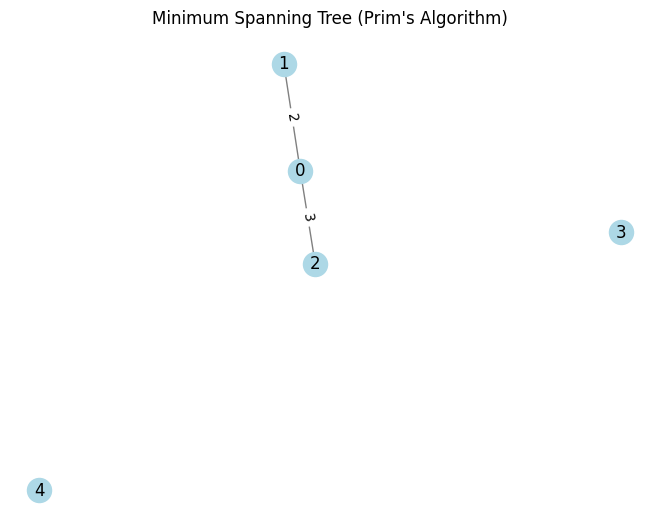

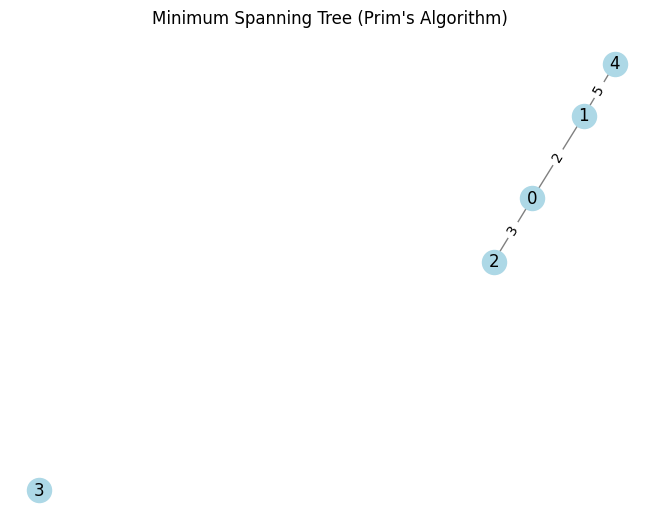

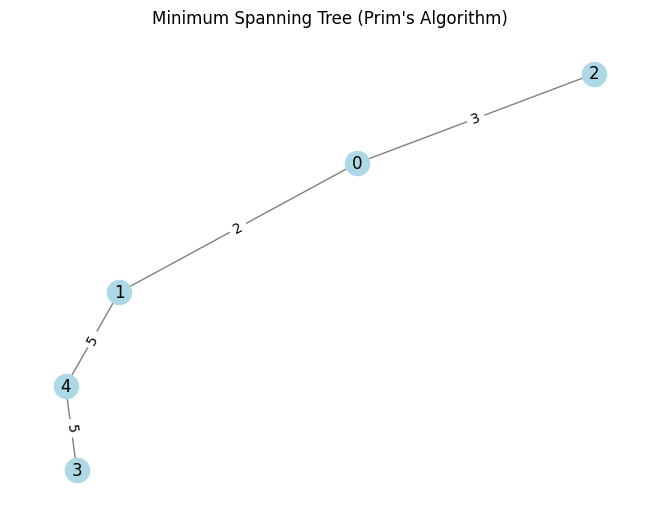

In [13]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

def visualize_graph(graph, mst_edges):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for edge in mst_edges:
        u, v, w = edge
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree (Prim's Algorithm)")
    plt.pause(1)

def prims_mst(graph):
    n = len(graph)
    mst = []
    visited = set()
    pq = [(0, 0, None)]  # (cost, node, parent)

    while len(mst) < n - 1:
        cost, node, parent = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        if parent is not None:
            mst.append((parent, node, cost))
            visualize_graph(graph, mst)  # Visualization

        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                heapq.heappush(pq, (weight, neighbor, node))

    return mst

# User Input
n = int(input("Enter number of nodes: "))
graph = {i: [] for i in range(n)}

for _ in range(int(input("Enter number of edges: "))):
    u, v, w = map(int, input("Enter edge (u, v, weight): ").split())
    graph[u].append((v, w))
    graph[v].append((u, w))

plt.ion()
print("Running Prim's Algorithm...")
prims_mst(graph)
plt.ioff()
plt.show()


Enter number of nodes:  5
Enter number of edges:  7
Enter edge (u, v, weight):  0 1 2
Enter edge (u, v, weight):  0 2 3
Enter edge (u, v, weight):  1 2 8
Enter edge (u, v, weight):  1 3 6
Enter edge (u, v, weight):  1 4 5
Enter edge (u, v, weight):  2 4 7
Enter edge (u, v, weight):  3 4 5

# Single-Source Shortest Path - Dijkstra’s Algorithm

Enter the number of nodes:  5
Enter node 1:  0
Enter the number of edges for node 0:  2
Enter neighbor and weight (space-separated):  1 2
Enter neighbor and weight (space-separated):  2 4
Enter node 2:  1
Enter the number of edges for node 1:  3
Enter neighbor and weight (space-separated):  0 2
Enter neighbor and weight (space-separated):  2 1
Enter neighbor and weight (space-separated):  3 7
Enter node 3:  2
Enter the number of edges for node 2:  3
Enter neighbor and weight (space-separated):  0 4
Enter neighbor and weight (space-separated):  1 1
Enter neighbor and weight (space-separated):  3 3
Enter node 4:  3
Enter the number of edges for node 3:  2
Enter neighbor and weight (space-separated):  1 7
Enter neighbor and weight (space-separated):  2 3
Enter node 5:  4
Enter the number of edges for node 4:  1
Enter neighbor and weight (space-separated):  3 2
Enter start node:  0


Running Dijkstra's Algorithm...


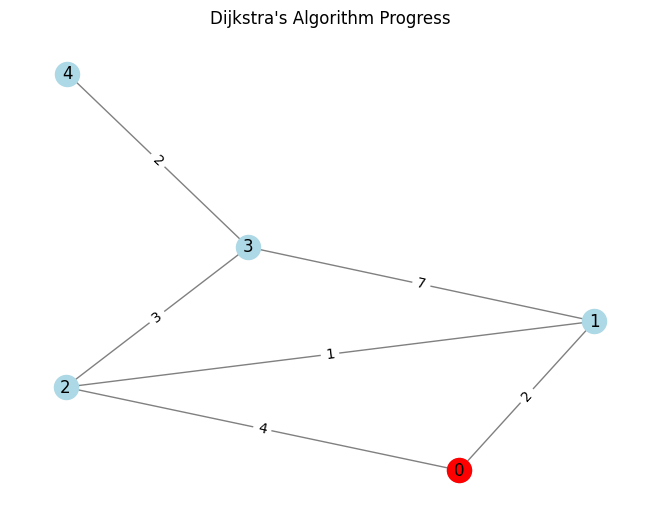

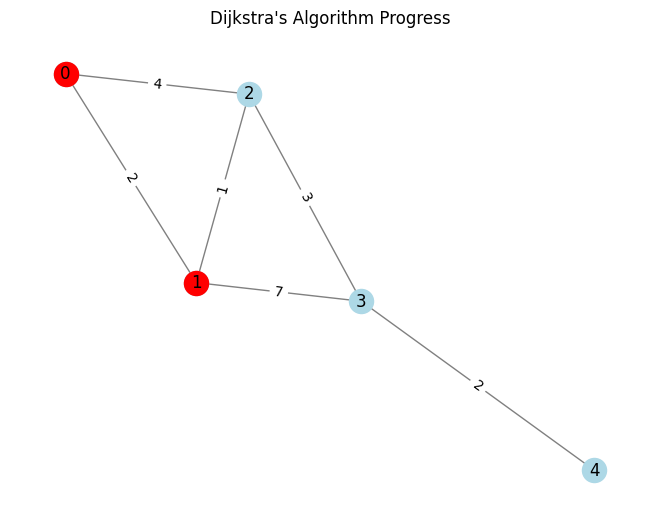

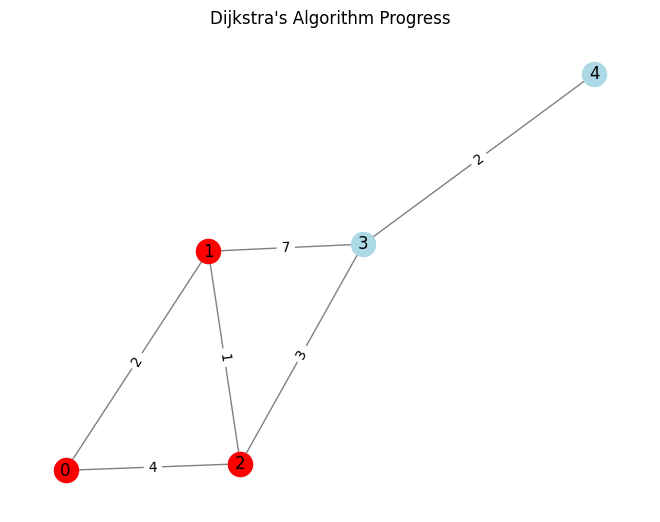

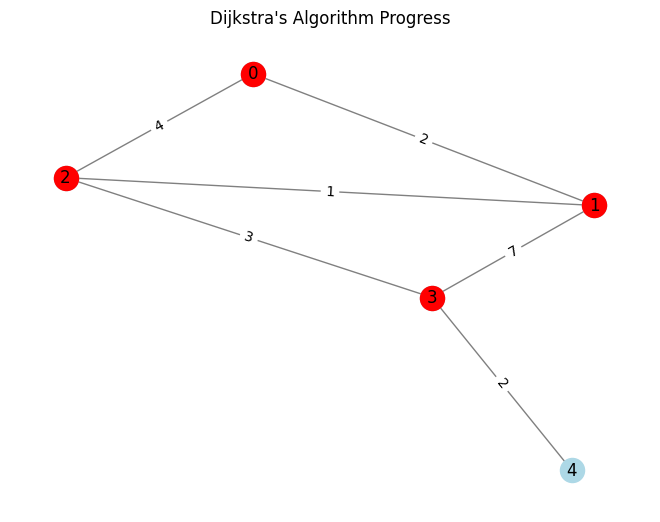

Shortest paths: {0: 0, 1: 2, 2: 3, 3: 6, 4: inf}


In [17]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def visualize_dijkstra(graph, distances, visited):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight visited nodes
    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red')
    plt.title("Dijkstra's Algorithm Progress")
    plt.pause(1)

def dijkstra(graph, start):
    heap = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = []

    while heap:
        cost, node = heapq.heappop(heap)
        if node in visited:
            continue
        visited.append(node)
        visualize_dijkstra(graph, distances, visited)  # Visualization

        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))

    return distances

# Taking user input for graph construction
graph = {}
num_nodes = int(input("Enter the number of nodes: "))

for i in range(num_nodes):
    node = int(input(f"Enter node {i+1}: "))
    graph[node] = []
    num_edges = int(input(f"Enter the number of edges for node {node}: "))
    for _ in range(num_edges):
        neighbor, weight = map(int, input("Enter neighbor and weight (space-separated): ").split())
        graph[node].append((neighbor, weight))

start_node = int(input("Enter start node: "))

plt.ion()
print("Running Dijkstra's Algorithm...")
print("Shortest paths:", dijkstra(graph, start_node))
plt.ioff()
plt.show()

Enter the number of nodes:  5
Enter node 1:  0
Enter the number of edges for node 0:  2
Enter neighbor and weight (space-separated):  1 2
Enter neighbor and weight (space-separated):  2 4
Enter node 2:  1
Enter the number of edges for node 1:  3
Enter neighbor and weight (space-separated):  0 2
Enter neighbor and weight (space-separated):  2 1
Enter neighbor and weight (space-separated):  3 7
Enter node 3:  2
Enter the number of edges for node 2:  3
Enter neighbor and weight (space-separated):  0 4
Enter neighbor and weight (space-separated):  1 1
Enter neighbor and weight (space-separated):  3 3
Enter node 4:  3
Enter the number of edges for node 3:  2
Enter neighbor and weight (space-separated):  1 7
Enter neighbor and weight (space-separated):  2 3
Enter node 5:  4
Enter the number of edges for node 4:  1
Enter neighbor and weight (space-separated):  3 2
Enter start node:  0

# Job Scheduling Problem

In [6]:
def job_scheduling(jobs):
    jobs.sort(key=lambda x: x[1], reverse=True)
    result = []
    for job in jobs:
        result.append(job[0])
    return result

# User Input
n = int(input("Enter number of jobs: "))
jobs = []
for _ in range(n):
    name, profit = input("Enter job name and profit: ").split()
    jobs.append((name, int(profit)))

print("Scheduled Jobs:", job_scheduling(jobs))


Scheduled Jobs: ['C', 'A', 'B']


# Kruskal’s Algorithm

Enter number of nodes:  5
Enter number of edges:  7


Enter edges in the format: u v weight (space separated integers)


Enter edge (u v weight):  0 1 2
Enter edge (u v weight):  0 3 6
Enter edge (u v weight):  1 2 3
Enter edge (u v weight):  1 2 3
Enter edge (u v weight):  1 4 5
Enter edge (u v weight):  2 4 7
Enter edge (u v weight):  3 4 9


Running Kruskal's Algorithm...


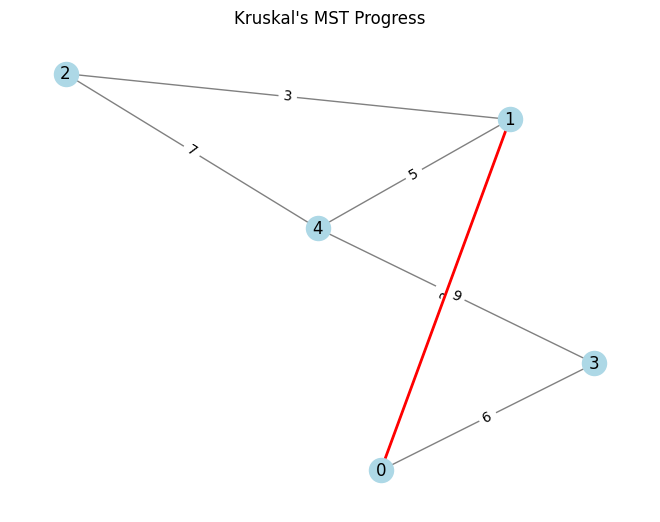

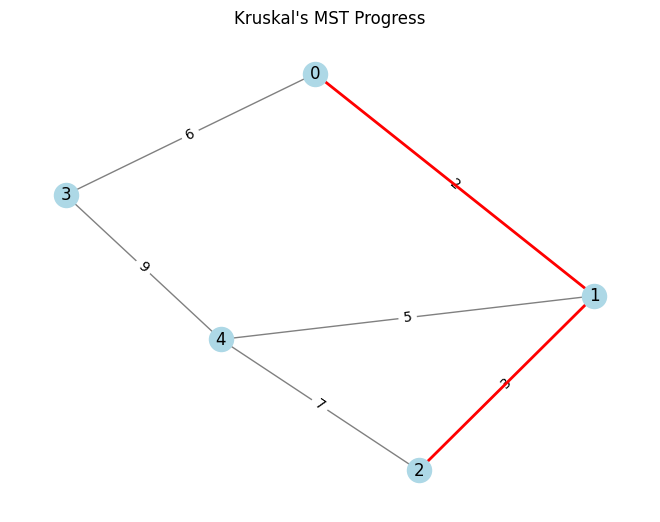

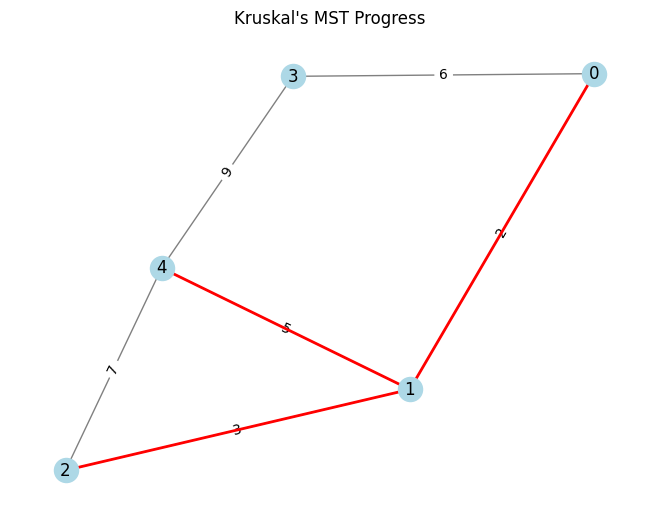

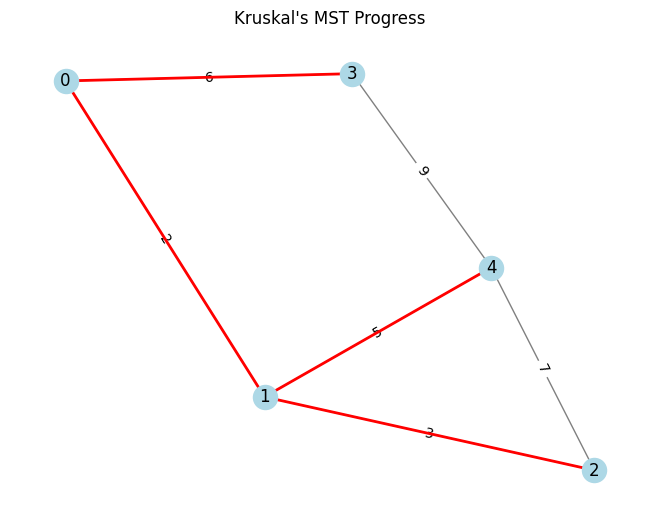

Minimum Spanning Tree (MST):
0 -- 1 == 2
1 -- 2 == 3
1 -- 4 == 5
0 -- 3 == 6


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_kruskal(edges, mst):
    G = nx.Graph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight MST edges
    mst_edges = [(u, v) for u, v, _ in mst]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2)
    plt.title("Kruskal's MST Progress")
    plt.pause(1)

def kruskal(graph, n):
    edges = sorted(graph, key=lambda x: x[2])
    parent = {i: i for i in range(n)}
    
    def find(v):
        if parent[v] != v:
            parent[v] = find(parent[v])
        return parent[v]

    mst = []
    for u, v, weight in edges:
        pu, pv = find(u), find(v)
        if pu != pv:
            mst.append((u, v, weight))
            parent[pu] = pv
            visualize_kruskal(edges, mst)

    return mst

# User Input Section
import matplotlib.pyplot as plt

try:
    edges = []
    n = int(input("Enter number of nodes: "))
    e = int(input("Enter number of edges: "))
    print("Enter edges in the format: u v weight (space separated integers)")
    for _ in range(e):
        u, v, w = map(int, input("Enter edge (u v weight): ").split())
        edges.append((u, v, w))

    plt.ion()
    print("Running Kruskal's Algorithm...")
    mst = kruskal(edges, n)
    plt.ioff()
    plt.show()

    print("Minimum Spanning Tree (MST):")
    for u, v, w in mst:
        print(f"{u} -- {v} == {w}")

except Exception as ex:
    print("Error:", ex)


In [ ]:
Enter number of nodes: 5
Enter number of edges: 7
Enter edge (u, v, weight): 0 1 2
Enter edge (u, v, weight): 0 3 6
Enter edge (u, v, weight): 1 2 3
Enter edge (u, v, weight): 1 2 3
Enter edge (u, v, weight): 1 4 5
Enter edge (u, v, weight): 2 4 7
Enter edge (u, v, weight): 3 4 9
Running Kruskal's Algorithm...
